In [2]:
from pythtb import * # import TB model class
import numpy as np

import matplotlib.pyplot as plt

import ase
import ase.io
import ase.neighborlist
import ase.visualize.plot

In [3]:
geom = ase.io.read("./clars_goblet.xyz")

In [4]:
i_arr, j_arr = ase.neighborlist.neighbor_list('ij', geom, 1.8)

In [5]:
lat = [
    [1.0,0.0],
    [0.0,1.0]
]

In [6]:
geom.center(about=0.0)

In [7]:
orb = []
for at in geom:
    orb.append(at.position[:2])

In [8]:
my_model=tb_model(0,2,lat,orb)

t=-2.8

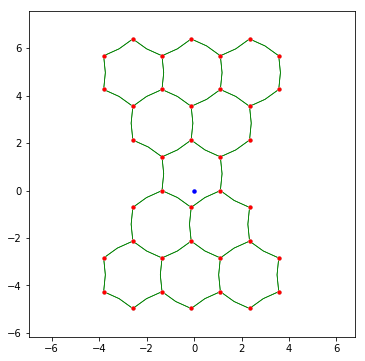

In [9]:
for i_at, j_at in zip(i_arr, j_arr):
    if i_at < j_at:
        my_model.set_hop(t, i_at, j_at)
            
my_model.visualize(0, 1)
plt.show()

# Solve

In [12]:
(evals,evecs)=my_model.solve_all(eig_vectors=True)

print("type of evals: " + str(type(evals)))
print("shape of evals: " + str(np.shape(evals)))
print("type of evecs: " + str(type(evecs)))
print("shape of evecs: " + str(np.shape(evecs)))
ed = my_model.get_num_orbitals()//2
print(my_model.get_num_orbitals(), ed)
homo = ed-1

type of evals: <class 'numpy.ndarray'>
shape of evals: (38,)
type of evecs: <class 'numpy.ndarray'>
shape of evecs: (38, 38)
38 19


In [ ]:
plt.plot(evals[ed-6:ed+6], 'o')
plt.show()
for ev in evals[ed-4:ed+4]:
    print(ev)

In [ ]:
def visualize_backbone(ax, atoms):
    i_arr, j_arr = ase.neighborlist.neighbor_list('ij', atoms, 1.8)
    for i, j in zip(i_arr, j_arr):
        if i < j:
            p1 = atoms.positions[i]
            p2 = atoms.positions[j]
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-', linewidth=3.0, solid_capstyle='round')
            
def visualize_evec(ax, atoms, evec):
    for at, e in zip(atoms, evec):
        p = at.position
        mod = np.abs(e)
        phase = np.angle(e)/np.pi
        col = (1.0-phase, 0.0, phase)
        circ = plt.Circle(p[:2], mod, color=col, zorder=10)
        ax.add_artist(circ)

In [ ]:
for ind in range(ed-4, ed+4):
    fig=plt.figure(figsize=(6,6))
    ax = plt.gca()
    ax.set_aspect('equal')
    visualize_backbone(ax, geom)
    visualize_evec(ax, geom, evecs[ind,:])
    plt.axis('off')
    xmin = np.min(geom.positions[:, 0])-0.7
    xmax = np.max(geom.positions[:, 0])+0.7
    ymin = np.min(geom.positions[:, 1])+0.2
    ymax = np.max(geom.positions[:, 1])+0.2
    plt.xlim([xmin, xmax])
    plt.text(xmin+1.0, ymin-0.6, "E = %.2f eV" % evals[ind], fontsize=20)
    plt.savefig("./fig_5-5/orb_%d_%d.png" % (ind, ind-homo), dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(2, 12))
ax = plt.gca()
for ev in evals[ed-3:ed+3]:
    col = 'blue'
    if ev < 0.0:
        col = 'red'
    plt.plot([0.1, 0.9], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    
ax.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlim(0.0, 1.0)
plt.ylim(-3.0, 3.0)
plt.ylabel("Energy (eV)")
plt.savefig("./levels.png", dpi=300, bbox_inches='tight')